In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [202]:
df = pd.read_csv('finaldata.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [203]:
df.shape

(10000, 18)

In [204]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

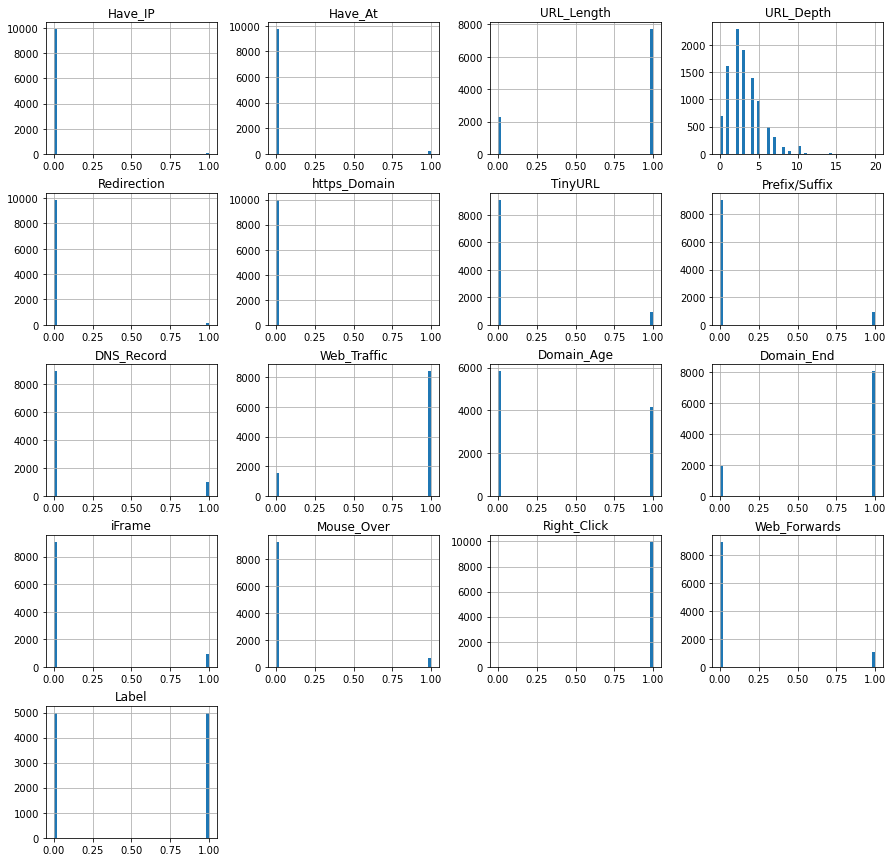

In [206]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

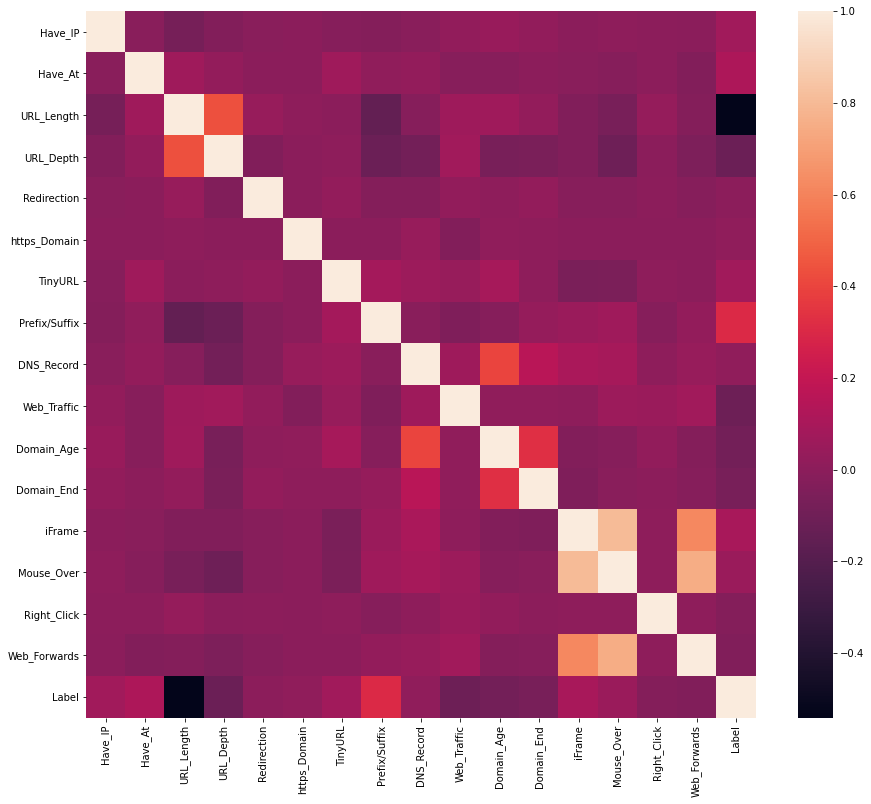

In [207]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [208]:
df.corr()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
Have_IP,1.000000,-0.011308,-0.076021,-0.030466,-0.008700,-0.001052,-0.023430,-0.023841,-0.011425,0.024279,0.047349,0.018799,-0.004701,0.007251,0.001968,-0.003487,0.074367
Have_At,-0.011308,1.000000,0.067844,0.029944,-0.000297,-0.002151,0.067122,0.018369,0.025073,-0.017002,-0.017072,0.001651,-0.008294,-0.021728,0.004025,-0.030246,0.118419
URL_Length,-0.076021,0.067844,1.000000,0.439378,0.038482,0.007656,-0.005318,-0.146102,-0.019508,0.063717,0.071029,0.028755,-0.039903,-0.068104,0.030833,-0.023651,-0.541287
URL_Depth,-0.030466,0.029944,0.439378,1.000000,-0.040189,-0.000478,0.010980,-0.114919,-0.086073,0.075315,-0.070101,-0.061798,-0.039297,-0.105889,-0.002657,-0.051248,-0.119707
Redirection,-0.008700,-0.000297,0.038482,-0.040189,1.000000,-0.001655,0.026634,-0.025581,-0.027654,0.018784,0.012581,0.025758,-0.012876,-0.017346,0.003096,-0.023193,0.002600
https_Domain,-0.001052,-0.002151,0.007656,-0.000478,-0.001655,1.000000,-0.004456,-0.004534,0.042243,-0.033112,0.016837,0.006852,-0.004472,-0.003778,0.000374,-0.004852,0.014144
TinyURL,-0.023430,0.067122,-0.005318,0.010980,0.026634,-0.004456,1.000000,0.087421,0.059078,0.040888,0.095944,0.006812,-0.062000,-0.054771,0.008339,-0.003508,0.072921
Prefix/Suffix,-0.023841,0.018369,-0.146102,-0.114919,-0.025581,-0.004534,0.087421,1.000000,-0.006793,-0.046843,-0.019954,0.031711,0.050594,0.070263,-0.017527,0.030102,0.302705
DNS_Record,-0.011425,0.025073,-0.019508,-0.086073,-0.027654,0.042243,0.059078,-0.006793,1.000000,0.065776,0.398583,0.162210,0.103266,0.094410,0.008861,0.042050,0.015943
Web_Traffic,0.024279,-0.017002,0.063717,0.075315,0.018784,-0.033112,0.040888,-0.046843,0.065776,1.000000,0.013681,0.015998,0.006990,0.057473,0.051495,0.073485,-0.108793


In [209]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [210]:
df_new = df.drop(['Domain'], axis = 1).copy()

In [211]:
df_new.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [212]:
df_new = df_new.sample(frac=1).reset_index(drop=True)
df_new.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,12,0,0,1,0,1,1,1,1,0,0,1,0,1
1,0,0,1,10,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,1,1,2,0,0,0,0,0,1,0,0,0,0,1,0,1
3,0,0,1,4,0,0,0,1,0,1,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1


In [213]:
y = df_new['Label']
X = df_new.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [214]:
y = df_new['Label']
X = df_new.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.050s...
[t-SNE] Computed neighbors for 10000 samples in 0.875s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.844898
[t-SNE] KL divergence after 1000 iterations: 0.369460


[Text(0.5, 1.0, ' T-SNE projection')]

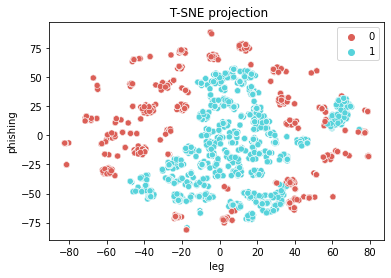

In [19]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df_new)
df = pd.DataFrame()
df["y"] = y
df["leg"] = z[:,0]
df["phishing"] = z[:,1]

sns.scatterplot(x="leg", y="phishing", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" T-SNE projection")

In [216]:
from sklearn.metrics import accuracy_score

In [217]:
Machine_learning_Model = []
accuracy_train = []
accuracy_test = []

In [218]:
def ALL_Results(model, a,b):
    Machine_learning_Model.append(model)
    accuracy_train.append(round(a, 3))
    accuracy_test.append(round(b, 3))

In [219]:

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [220]:
y_test_decision_tree = decision_tree.predict(X_test)
y_train_decision_tree = decision_tree.predict(X_train)

In [221]:
accuracy_train_tree = accuracy_score(y_train,y_train_decision_tree )
accuracy_test_tree = accuracy_score(y_test,y_test_decision_tree)

print("Decision Tree Accuracy using training Data:{:.2f}".format(accuracy_train_tree))
print("Decision Tree Accuracy using test Data: {:.2f}".format(accuracy_test_tree))

Decision Tree Accuracy using training Data:0.82
Decision Tree Accuracy using test Data: 0.80


In [222]:
from sklearn.metrics import classification_report
predicted = decision_tree.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83       979
           1       0.98      0.62      0.76      1021

    accuracy                           0.80      2000
   macro avg       0.85      0.80      0.79      2000
weighted avg       0.85      0.80      0.79      2000



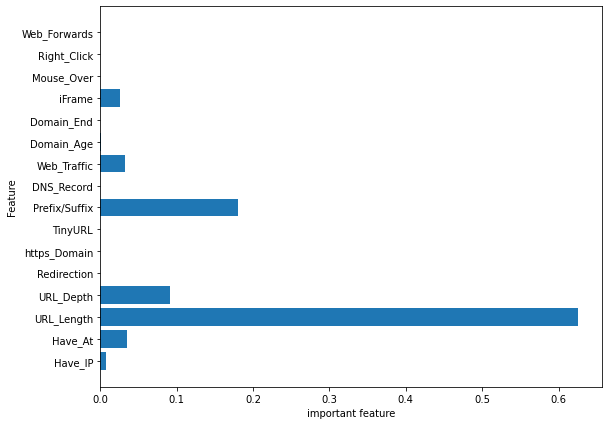

In [223]:
plt.figure(figsize=(9,7))
new_features = X_train.shape[1]
plt.barh(range(new_features ), decision_tree.feature_importances_, align='center')
plt.yticks(np.arange(new_features ), X_train.columns)
plt.xlabel("important feature")
plt.ylabel("Feature")
plt.show()

In [224]:

ALL_Results('Decision Tree', accuracy_train_tree, accuracy_test_tree)

In [225]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier


Rand_forest = RandomForestClassifier(max_depth=5)


Rand_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [226]:
#prediction of  target value 
y_test_forest = Rand_forest.predict(X_test)
y_train_forest = Rand_forest.predict(X_train)

In [227]:
predicted = Rand_forest.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83       979
           1       0.99      0.63      0.77      1021

    accuracy                           0.80      2000
   macro avg       0.85      0.81      0.80      2000
weighted avg       0.85      0.80      0.80      2000



In [228]:
#calculating accuracy of model's performance
acc_train_Rand_forest = accuracy_score(y_train,y_train_forest)
acc_test_Rand_forest = accuracy_score(y_test,y_test_forest)

print("Random forest  Accuracy using training Data: {:.2f}".format(acc_train_Rand_forest))
print("Random forest Accuracy using test Data: {:.2f}".format(acc_test_Rand_forest))

Random forest  Accuracy using training Data: 0.83
Random forest Accuracy using test Data: 0.80


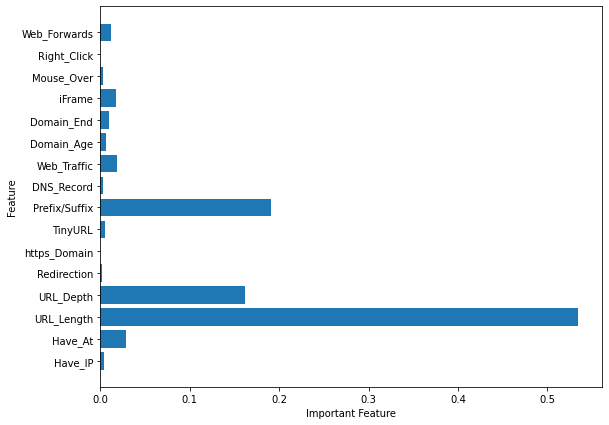

In [229]:
#checking important feature of the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), Rand_forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Important Feature")
plt.ylabel("Feature")
plt.show()

In [230]:

Results('Random Forest',acc_train_Rand_forest, acc_test_Rand_forest)

In [231]:
# Multilayer Perceptrons 
from sklearn.neural_network import MLPClassifier


multi_layer_percep = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

multi_layer_percep.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [232]:
#predicting the target value from the model for the samples
y_test_mlp = multi_layer_percep.predict(X_test)
y_train_mlp = multi_layer_percep.predict(X_train)

In [233]:
predicted = multi_layer_percep.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       979
           1       0.94      0.74      0.83      1021

    accuracy                           0.84      2000
   macro avg       0.86      0.85      0.84      2000
weighted avg       0.86      0.84      0.84      2000



In [234]:
#calculating accuracy of  model's  performance

acc_train_multi_layer_percep = accuracy_score(y_train,y_train_mlp)
acc_test_multi_layer_percep = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons  Accuracy using training Data: {:.2f}".format(acc_train_multi_layer_percep))
print("Multilayer Perceptrons: Accuracy using  test Data: {:.2f}".format(acc_test_multi_layer_percep))

Multilayer Perceptrons  Accuracy using training Data: 0.87
Multilayer Perceptrons: Accuracy using  test Data: 0.84


In [235]:

ALL_Results('Multilayer Perceptrons', acc_train_multi_layer_percep, acc_test_multi_layer_percep)

In [132]:
#XGBoost Classifer model

from xgboost import XGBClassifier

xgbst = XGBClassifier(learning_rate=0.4,max_depth=7)

xgbst.fit(X_train, y_train)

[06:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
#!pip install xgboost

In [236]:
from xgboost import XGBClassifier

xgbst = XGBClassifier(learning_rate=0.4,max_depth=7)

xgbst.fit(X_train, y_train)

[06:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
#predicting the target value from the model for the samples
y_test_xgb = xgbst.predict(X_test)
y_train_xgb = xgbst.predict(X_train)

In [238]:
predicted = xgbst.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       979
           1       0.92      0.76      0.83      1021

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



In [137]:
#calculating  the accuracy of model's  performance
acc_train_xgbst = accuracy_score(y_train,y_train_xgb)
acc_test_xgbst = accuracy_score(y_test,y_test_xgb)

print("XGBoost Accuracy using training Data: {:.2f}".format(acc_train_xgbst))
print("XGBoost Accuracy using test Data: {:.2f}".format(acc_test_xgbst))

XGBoost Accuracy using training Data: 0.87
XGBoost Accuracy using test Data: 0.85


In [239]:

ALL_Results('XGBoost', acc_train_xgbst, acc_test_xgbst)

In [240]:
#importing the  packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [241]:
#building ANN model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 16)                272       
                                                                 
 dense_24 (Dense)            (None, 14)                238       
                                                                 
 dense_27 (Dense)            (None, 16)                240       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable p

In [242]:

autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 4.6619 - accuracy: 0.0327 - val_loss: 4.4185 - val_accuracy: 0.0506
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 4.3889 - accuracy: 0.0402 - val_loss: 4.3360 - val_accuracy: 0.0269
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.9182 - accuracy: 0.2562 - val_loss: -0.6079 - val_accuracy: 0.8288
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: -0.6492 - accuracy: 0.8366 - val_loss: -0.6365 - val_accuracy: 0.7556
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: -0.6752 - accuracy: 0.6116 - val_loss: -0.6644 - val_accuracy: 0.3625
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: -0.6764 - accuracy: 0.7739 - val_loss: -0.6694 - val_accuracy: 0.7538
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: -0.6988 - accuracy: 0.4938 - val_loss: -0.6843 - val_accuracy: 0.17

In [142]:
acc_train_auto_ann = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto_ann = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder Accuracy using training Data: {:.2f}' .format(acc_train_auto_ann))
print('Autoencoder: Accuracy using  test Data: {:.2f}' .format(acc_test_auto_ann))

63/63 [==============================] - 0s 2ms/step - loss: -1.8857 - accuracy: 0.1855

Autoencoder Accuracy using training Data: 0.18
Autoencoder: Accuracy using  test Data: 0.19


In [243]:

ALL_Results('AutoEncoder', acc_train_auto_ann, acc_test_auto_ann)

In [244]:
#Support vector machine model

from sklearn.svm import SVC


sup_vec_mach = SVC(kernel='linear', C=1.0, random_state=12)

sup_vec_mach.fit(X_train, y_train)


SVC(kernel='linear', random_state=12)

In [245]:
y_test_svm = sup_vec_mach.predict(X_test)
y_train_svm = sup_vec_mach.predict(X_train)

In [246]:
predicted =sup_vec_mach.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.70      0.98      0.82       979
           1       0.97      0.60      0.74      1021

    accuracy                           0.79      2000
   macro avg       0.83      0.79      0.78      2000
weighted avg       0.84      0.79      0.78      2000



In [247]:
#computing the accuracy of the model performance
acc_train_sup_vec_mach = accuracy_score(y_train,y_train_svm)
acc_test_sup_vec_mach = accuracy_score(y_test,y_test_svm)

print("SVM Accuracy using training Data: {:.2f}".format(acc_train_sup_vec_mach))
print("SVM Accuracy using  test Data: {:.2f}".format(acc_test_sup_vec_mach))

SVM Accuracy using training Data: 0.81
SVM Accuracy using  test Data: 0.79


In [248]:

ALL_Results('SVM', acc_train_sup_vec_mach, acc_test_sup_vec_mach)

In [156]:
#dataframe
Final_results = pd.DataFrame({ 'Machine_learning_Model': Machine_learning_Model,    
    'Train Accuracy':  accuracy_train,
  'Test Accuracy':  accuracy_test})
Final_results

,Machine_learning_Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.815,0.807
1,Random Forest,0.819,0.810
2,Multilayer Perceptrons,0.866,0.852
3,XGBoost,0.869,0.850
4,AutoEncoder,0.178,0.185
5,SVM,0.803,0.799
6,AutoEncoder,0.178,0.185
7,SVM,0.803,0.799


In [249]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [250]:
KNN = KNeighborsClassifier()
# train the model using the training sub-dataset
KNN.fit(X_train, y_train)

predicted = KNN.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       979
           1       0.83      0.78      0.81      1021

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [251]:
y_test_KNN = KNN.predict(X_test)
y_train_KNN = KNN.predict(X_train)

In [252]:
#computing the accuracy of the model performance
acc_train_KNN = accuracy_score(y_train,y_train_KNN)
acc_test_KNN = accuracy_score(y_test,y_test_KNN)

print("KNN Accuracy using training Data: {:.2f}".format(acc_train_KNN))
print("KNN Accuracy using  test Data: {:.2f}".format(acc_test_KNN))

KNN Accuracy using training Data: 0.83
KNN Accuracy using  test Data: 0.81


In [191]:
#score the accuracy leve
result = KNN.score(X_test, y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 84.950%


In [253]:
ALL_Results('KNN', acc_train_KNN, acc_test_KNN)

In [254]:
from sklearn.linear_model import LogisticRegression


seed = 7

log_Reg = LogisticRegression(random_state=seed, max_iter=1000)

# train the model using the training sub-dataset

log_Reg.fit(X_train, y_train)

#print the classification report

predicted = log_Reg.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n",report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.71      0.95      0.81       979
           1       0.93      0.63      0.75      1021

    accuracy                           0.79      2000
   macro avg       0.82      0.79      0.78      2000
weighted avg       0.82      0.79      0.78      2000



In [255]:
y_test_log_Reg = log_Reg.predict(X_test)
y_train_log_Reg = log_Reg.predict(X_train)

In [256]:
#computing the accuracy of the model performance
acc_train_logre = accuracy_score(y_train,y_train_log_Reg)
acc_test_logre = accuracy_score(y_test,y_test_log_Reg)

print("LogisticRegression Accuracy using training Data: {:.2f}".format(acc_train_KNN))
print("LogisticRegression Accuracy using  test Data: {:.2f}".format(acc_test_KNN))

LogisticRegression Accuracy using training Data: 0.83
LogisticRegression Accuracy using  test Data: 0.81


In [257]:
ALL_Results('LogisticRegression', acc_train_logre, acc_test_logre)

In [258]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [259]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                170       
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [260]:
history = model.fit(X_train, y_train,
                     epochs=100,
                    verbose=False,
                     validation_data=(X_test, y_test),
                    batch_size=10)


In [263]:
loss, accuracy= model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.2f}".format(accuracy))


Training Accuracy: 0.83
Testing Accuracy:  0.80


In [265]:
ALL_Results('CNN',accuracy,accuracy)

In [266]:
ALL_results = pd.DataFrame({ 'Machine_learning_Model': Machine_learning_Model,    
    'Train Accuracy':  accuracy_train,
  'Test Accuracy':  accuracy_test})
ALL_results

,Machine_learning_Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.817,0.798
1,Random Forest,0.825,0.804
2,Multilayer Perceptrons,0.870,0.844
3,XGBoost,0.869,0.850
4,AutoEncoder,0.178,0.185
5,SVM,0.806,0.786
6,KNN,0.828,0.806
7,LogisticRegression,0.810,0.786
8,CNN,0.803,0.803


In [267]:
ALL_results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,Machine_learning_Model,Train Accuracy,Test Accuracy
3,XGBoost,0.869,0.850
2,Multilayer Perceptrons,0.870,0.844
6,KNN,0.828,0.806
1,Random Forest,0.825,0.804
8,CNN,0.803,0.803
0,Decision Tree,0.817,0.798
7,LogisticRegression,0.810,0.786
5,SVM,0.806,0.786
4,AutoEncoder,0.178,0.185
